In [1]:
import boto3
import time
import json

session = boto3.Session(profile_name='nikita')
log_client = session.client('logs')


import numpy as np
import math
%pylab inline

In [2]:
space = [0.5, 1, 1.5, 2, 3, 5, 10, 20, 40, 80]

# Query results

In [3]:
query = log_client.start_query(
    logGroupName='/aws/batch/job',
    startTime=0,
    endTime=int(time.time()),
    queryString="""
        fields @message
        | filter success == 1
        | limit 5000
    """,
    limit=5000
)

In [4]:
query_result = {'status': 'Scheduled'}
while query_result['status'] in ('Scheduled', 'Running'):
    query_result = log_client.get_query_results(queryId=query['queryId'])
    time.sleep(1)

In [5]:
data = [
    json.loads(row[0]['value'])
    for row in query_result['results']
]

In [7]:
len(data)

1720

In [8]:
useful = [x for x in data if x['player'].startswith('MCTSPlayer') and x['opponent'].startswith('MCTSPlayer')]

In [9]:
from datetime import timedelta as td
class MCTSPlayer:
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs


from collections import defaultdict
summary = defaultdict(list)

for match in useful:
    reverse = 'math.sqrt(2) / 2)' in match['opponent']
    c = eval(match['player'] if reverse else match['opponent']).kwargs['c']
    w = match['winner']
    if w is None:
        summary[c].append(0.5)
    else:
        summary[c].append((w + reverse) % 2)

In [10]:
ratios = {k: sum(v)/len(v) for k,v in summary.items()}

Populating the interactive namespace from numpy and matplotlib


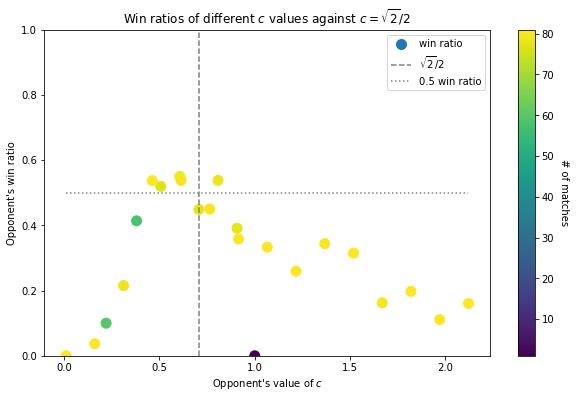

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(
    list(summary.keys()),
    [sum(v)/len(v) for v in summary.values()],
    c=[len(v) for v in summary.values()],
    label='win ratio',
    s=100
)
plt.vlines(SQRT22, 0, 1, linestyles='dashed', label="$\sqrt{2}/2$", color="grey")
plt.hlines(0.5, space[0] , space[-1], linestyles='dotted', label="0.5 win ratio", color="grey")
plt.legend()
cb = plt.colorbar()
cb.set_label('# of matches', rotation=270)
cb.ax.set_yticklabels([int(i) for i in cb.get_ticks()])
cb.ax.get_yaxis().labelpad = 15

plt.ylim(0, 1)

plt.title("Win ratios of different $c$ values against $c = \sqrt{2}/2$");
plt.xlabel("Opponent's value of $c$")
plt.ylabel("Opponent's win ratio");